# 03 케라스
## 3.1 딥러닝 준비
- 케라스: 다른 딥러닝 라이브러리과의 가장 큰 차이: GPU 연산을 수행하는 기능을 직접 실행하지 않고도 텐서플로, CNTK, THeano, MXNet 등의 백엔드 엔진을 지정하여 사용
- 케라스의 목적: 딥러닝 라이브러리를 간결한 코드로 실행할 수 있도록
- 케라스의 한계점: 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 지수준 API를 활용해야 함

### 3.1.1 주요 용어
- 하이퍼파라미터
- 과소적합, 과대적합
- 에포크 (epoch): 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 에포크라고 함
- 손실함수
  - supervised learning
    - binary classification
      - loss function: `binary_crossentropy`
      - activation function: `sigmoid`
    - multi-class classification:
      - 분류 대상 클래스: one-hot vector
        - loss function: `categorical_crossentropy`
      - 분류 대상 클래스: 레이블 값 (숫자)
        - loss function: `sparse_categorical_crossentropy`
      - 출력층의 activation function: `softmax`
    - 회귀: MSE, MAE, Huber 등


In [2]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

- 경사하강법
  - 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
  - 손실함수 값을 최소로 만드는 가중치 찾을 수 있음
  - Loss = 1/2 * sum(y-yhat)^2
  - y=wx+b
  - 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

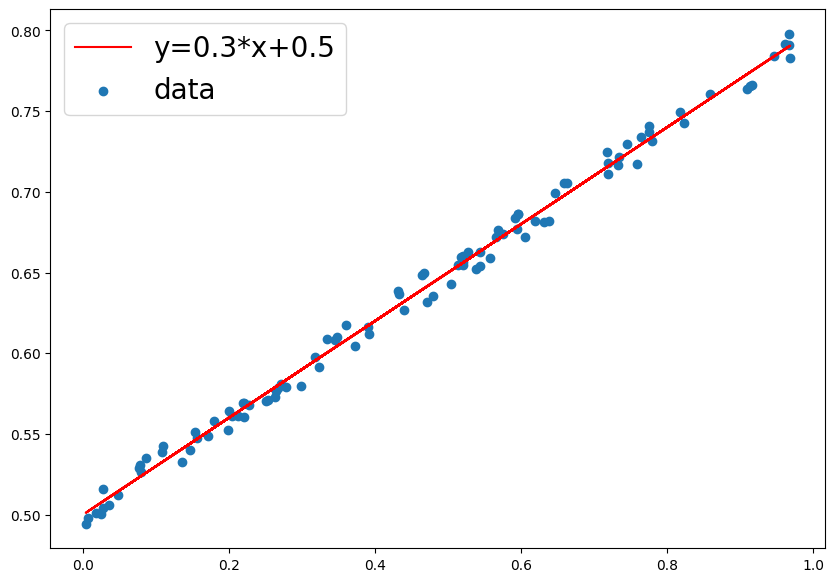

w:0.3,b:0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터세트
def make_linear(w=0.5,b=0.8,size=50,noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y=make_linear(w=0.3,b=0.5,size=100,noise=0.01)

In [4]:
# 최대 반복 횟수
num_epoch=1000

# 학습률
learning_rate=0.005

# 에러 기록
errors=[]

# random한 값으로 w,b초기화
w=np.random.uniform(low=0.0,high=1.0)
b=np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  y_hat=w*x+b

  # loss function 정의
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break
  #gradient 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}.b={2:.5f}error={3:.5f}'.format(epoch,w,b,error))

  print("-----"*15)
  print('{0:2}w={1:.1f}.b={2:.1f}error={3:.5f}'.format(epoch,w,b,error))

 0w=0.85690.b=0.16012error=3.06352
---------------------------------------------------------------------------
 0w=0.9.b=0.2error=3.06352
---------------------------------------------------------------------------
 1w=0.9.b=0.2error=1.54069
---------------------------------------------------------------------------
 2w=0.8.b=0.2error=1.24285
---------------------------------------------------------------------------
 3w=0.8.b=0.2error=1.13708
---------------------------------------------------------------------------
 4w=0.8.b=0.3error=1.06442
 5w=0.80151.b=0.25878error=1.00021
---------------------------------------------------------------------------
 5w=0.8.b=0.3error=1.00021
---------------------------------------------------------------------------
 6w=0.8.b=0.3error=0.94047
---------------------------------------------------------------------------
 7w=0.8.b=0.3error=0.88439
---------------------------------------------------------------------------
 8w=0.8.b=0.3error=0.83168
---

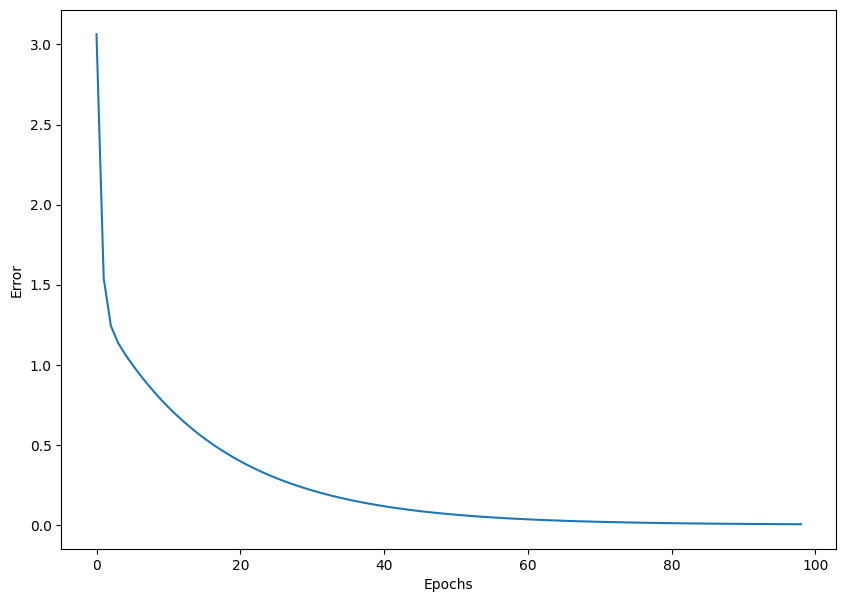

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 3.1.2 딥러닝 프로세스

1. 데이터 전처리
  - 스케일 조정, 차원 변경 가능
2.  모델 생성
  - 순차적인 구조 모델 : Sequential API
  - 다중 입력 출력 : Functional API, Model Subclassing
3. 모델 컴파일
  - 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 정의
4. 모델 훈련
  - fit()
  - epoch, 배치 크기, 콜백 함수
5. 모델 검증
  - 모델 훈련 시 사용하지 않은 검증 데이터셋을 모델에 입력하고 예측값을 정답과 비교하여 평가지표 계산
6. 모델 예측


## 3.2 단순 신경망 훈련
### 3.2.1 선형 회귀

- 단순선형회귀 모형: y=ax+b
- 딥러닝: y=wx+b
  - 딥러닝에서는 기울기 a 대신 가중치 w를 많이 사용
  - b는 편향

### 3.2.2 뉴런
- 노드
- 신경망은 여러개의 레이어를 가지고 하나의 레이어는 한개 이상의 뉴런으로 구성
- 뉴런 내부에는 가중치 존재, 훈련 진행하며 오차 역전파를 통해 뉴런의 가중치 업데이트

### 3.2.3 Dense layer
- 심층 신경망 모델을 구성하는 기본 레이어
- 완전 연결층
- 노드 개수와 활성화 함수 지정 가능


In [ ]:
#import tensorflow as tf

# 10 개 노드로 이루어진 Dense레이어
tf.keras.layers.Dense(10)

# Relu 활성화 함수 적용
tf.keras.layers.Dense(10,activation='relu')

### 3.2.4 데이터셋 만들기

In [13]:
x=np.arange(1,6)

y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


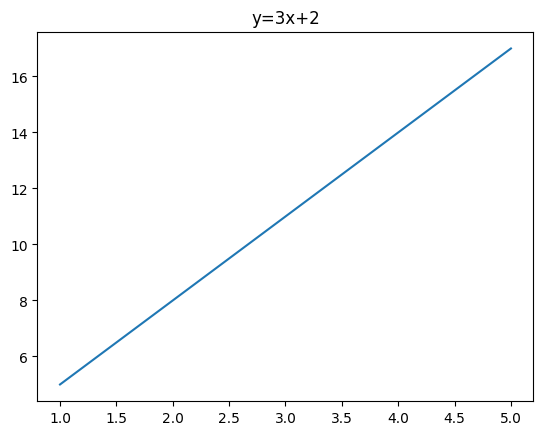

In [7]:
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### 3.2.5 sequential API

- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 가짐

#### 1. 모델 구조

In [8]:
import tensorflow as tf

# 리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [9]:
# add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2. 입력 데이터 형태

- Sequential API를 사용하면 첫번째 층은 input_shape 매개변수 지정해야함


In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#### 3. 단순선형회귀 모델 정의
- 1개의 뉴런을 가지는 Dense 레이어 한개 사용

In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

### 3.2.6 모델 요약


In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Total params : 모델 내부에 존재하는 모든 파라미터 합
- Trainable params : 모델 훈련 시 업데이트 할 파라미터 총 개수
- Non-trainable params : 훈련 시 업데이트하지 않을 파라미터 총 개수
- 단순 선형회귀모델에서는 업데이트 파라미터 : w,b

### 3.2.7 컴파일
- 모델 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의하는 단계
- 3가지 방법으로 지정 가능
  1. 클래스 인스턴스
    - pro: 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 정의 가능
  2. 함수
  3. 사전 정의된 문자열
    - 기본값으로 설정된 하이퍼파라미터 사용
    - con: 수정이 어렵다

In [16]:
# 긴 문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [18]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [19]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

단순선형회귀 모델 훈련
- 옵티마이저: 확률적 경사하강법 (SGD)
- 손실함수: MSE
- 평가지표: MAE

In [20]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

### 3.2.8 훈련



In [21]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 466ms/step - loss: 65.5692 - mae: 7.6474
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 38.3514 - mae: 5.8920
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 22.4893 - mae: 4.5518
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 13.2446 - mae: 3.5285
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 7.8564 - mae: 2.7472


In [22]:
# 단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

# 훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 322ms/step - loss: 52.0768 - mae: 6.8454
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 30.5031 - mae: 5.2825
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 17.9300 - mae: 4.0892
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 10.6020 - mae: 3.1781
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 6.3306 - mae: 2.4824
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 3.8404 - mae: 1.9511
Epoch 7/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.3882 - mae: 1.5453
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.5409 - mae: 1.2354
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.0461 - mae: 0.9986
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.7568 - mae: 0.8176
Epoch 11/1200
1/1 [==============================] - 0

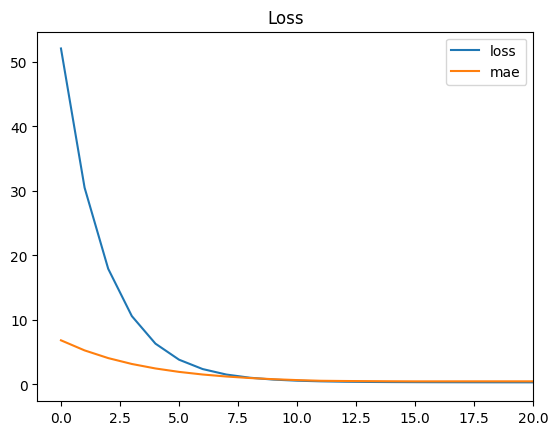

In [23]:
import matplotlib.pyplot as plt

# 20 epochs까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title("Loss")
plt.legend()
plt.show()

- 10 epoch까지 손실이 급격히 감소 (모델 훈련 초기 단계에 매우 빠른 학습)
- 이후 감소 폭이 둔화됨 (학습 속도가 느려짐)

### 3.2.9 검증

In [24]:
model.evaluate(x,y)

1/1 [==============================] - 0s 243ms/step - loss: 1.1170e-04 - mae: 0.0091


[0.00011169828940182924, 0.00907135009765625]

### 3.2.10 예측

In [25]:
model.predict([10])

1/1 [==============================] - 0s 101ms/step


array([[32.043842]], dtype=float32)

## 3.3 심층 신경망으로 이미지 분류
### 3.3.1 케라스 내장 데이터셋 로드

In [26]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

In [27]:
# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
# 데이터셋 확인
print('train set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


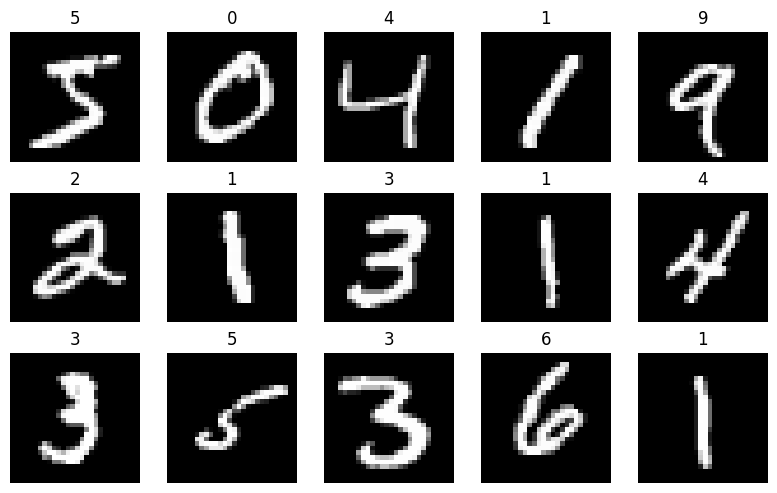

In [29]:
import matplotlib.pyplot as plt

# canvas 생성
fig,axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5,i%5]
  #imshow 로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3.3.2 데이터 전처리

In [30]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 0~255 범위의 값 가짐
- 데이터 범위를 0~1로 설정하기 위해 255로 나눔

In [31]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()},최대값:{x_train.max()}')

# 데이터 정규화
x_train=x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()},최대값:{x_train.max()}')

정규화 전] 최소값: 0,최대값:255
정규화 후] 최소값: 0.0,최대값:1.0


In [32]:
x_test=x_test/x_test.max()

In [33]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3.3.3 Flatten 레이어
- Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야함

In [34]:
print(f'변경 전 shape:{x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [35]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3.3.4 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수
- 선형 관계를 나타내는 함수에 비선형성 추가
- 시그모이드, 하이퍼볼릭 탄젠트, ReLU, ...

In [36]:
# Dense 레이어에 relu 활성화함수 적용
tf.keras.layers.Dense(128,activation='relu')

In [37]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3.3.5 입력과 출력
- input_shape 매개변수
- 마지막 레이어는 출력층
- 출력층의 노드 개수는 반드시 분류해야할 클래스 개수와 동일해야함

In [38]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드 = 10개 (클래스 개수)
    tf.keras.layers.Dense(10,activation='softmax'),

])


- 출력층 노드 개수가 2개 이상인 다중분류문제 경우에는 softmax 함수 적용

In [39]:
# 출력층 노드=1 => sigmoid
tf.keras.layers.Dense(1,activation='sigmoid')

# 출력층 노드=2개 이상 => softmax
tf.keras.layers.Dense(10,activation='softmax')

### 3.3.6 손실함수

In [40]:
# 이진 분류
model.compile(loss='binary_crossentropy')

In [41]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,1.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

### 3.3.7 옵티마이저
- 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- Adam (commonly used)
- 그 외 케라스에서 지원하는: SGD, Adagrad, RMSprop, Adadelta, Adamax, Ftrl

In [45]:
# 클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3.3.8 평가지표

- 분류 모델에 가장 많이 사용: accuracy
- 그 외: auc, precision, recall


In [48]:
# 클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [49]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

## 3.3.9 훈련

In [50]:
model.fit(x_train,y_train,
          # 검증 셋 지정
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2267 - accuracy: 0.9326 - val_loss: 0.1192 - val_accuracy: 0.9644
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0945 - accuracy: 0.9714 - val_loss: 0.0964 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0668 - accuracy: 0.9784 - val_loss: 0.0809 - val_accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0887 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.1093 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0783 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0902 - val_ac

### 3.3.10 평가

In [51]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('검증 셋 정확도:',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9812
검증 셋 정확도: 0.9811999797821045


### 3.3.11 예측

In [52]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [53]:
predictions[0]

array([1.7816830e-12, 6.1210977e-07, 3.7108353e-07, 1.4233716e-06,
       3.4576070e-10, 2.0002890e-10, 2.1005922e-13, 9.9999648e-01,
       5.5109814e-09, 1.0345437e-06], dtype=float32)

- softmax 활성화함수를 거친 10개의 출력값은 10개의 개별 클래스에 대한 분류 확률값
- 가장 높은 확률값을 가진 클래스가 최종 예측 출력값

In [54]:
import numpy as np

# 0번 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


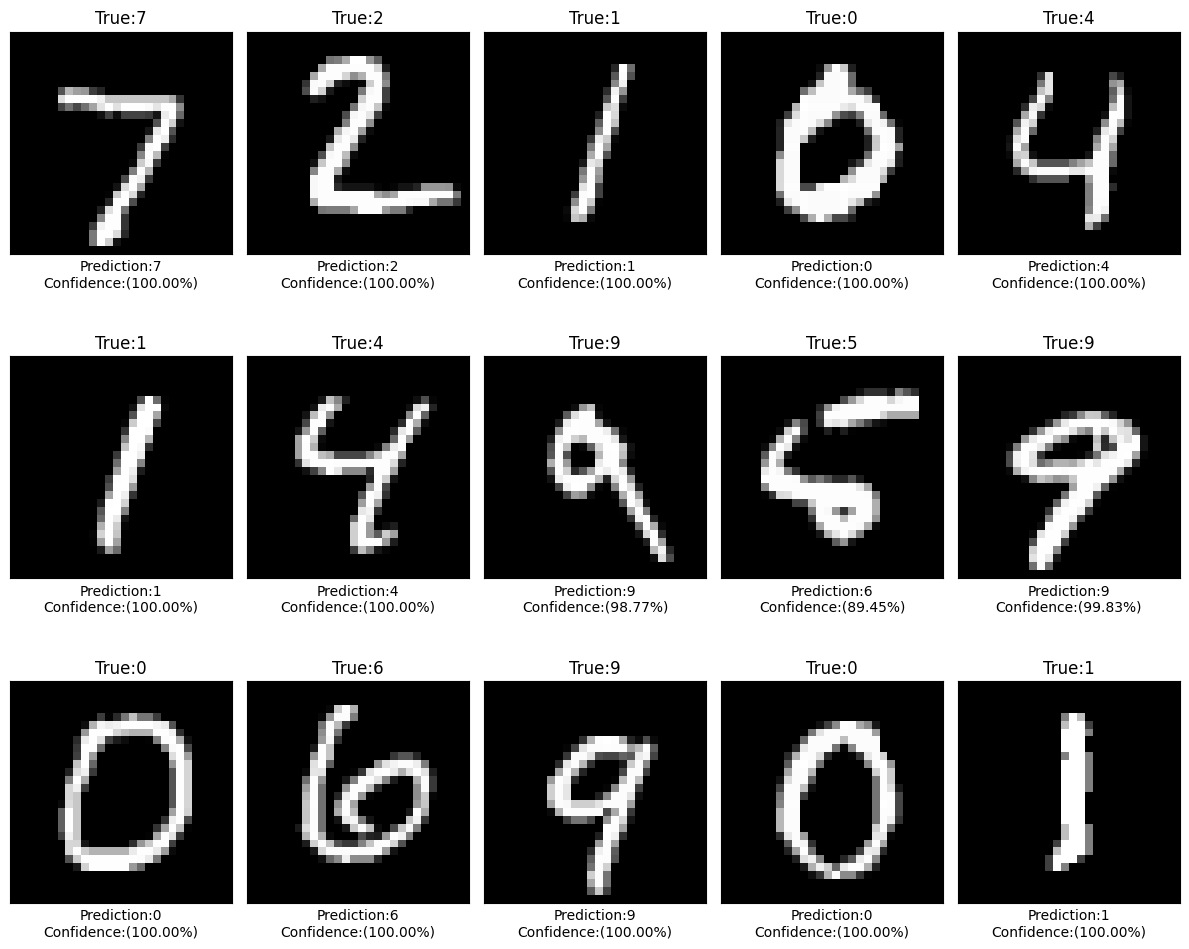

In [57]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx],y_test[idx],np.argmax(predictions[idx]),100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img,y_true,y_pred,confidence=get_one_result(i)
  #imshow 로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction:{y_pred}\nConfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()